# **1. Import Library**

Pada bagian ini, kita mengimpor berbagai pustaka yang diperlukan untuk analisis dan pemodelan data. Beberapa pustaka ini digunakan untuk manipulasi data, visualisasi, dan penerapan model pembelajaran mesin.

In [33]:
# Library Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# Library Scikit-learn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **2. 📊Load Data & Data Understanding**

Pada bagian ini, kita memuat dataset dari file CSV yang bernama AmesHousing.csv ke dalam sebuah DataFrame menggunakan pustaka pandas. Dataset ini berisi informasi tentang properti rumah di Ames, Iowa, yang digunakan untuk analisis prediksi harga rumah.

In [34]:
df = pd.read_csv('AmesHousing.csv')
print("\n📂 Dataset Shape:", df.shape)
df.head()


📂 Dataset Shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Dataset yang digunakan memiliki bentuk **2930 baris dan 82 kolom**, yang merepresentasikan informasi lengkap mengenai properti rumah yang akan dianalisis, termasuk fitur-fitur seperti ukuran lahan, kualitas material, jumlah kamar, hingga informasi penjualan. Kolom `SalePrice` menjadi variabel target (label) yang ingin diprediksi, sedangkan sisanya merupakan fitur penjelas baik numerik maupun kategorikal. Setiap baris mewakili satu rumah, dan data mencakup berbagai aspek penting seperti lokasi `Neighborhood`, kondisi fisik (`Overall Qual`, `Year Built`, `Garage Cars`, dll.), serta elemen tambahan seperti kolam, pagar, dan fitur lainnya. Dataset ini cukup kaya dan kompleks, memberikan dasar yang kuat untuk membangun model prediksi harga rumah yang akurat.

#### **Informasi Dataset**
Pada bagian ini, kita menggunakan fungsi info() dari pandas untuk mendapatkan informasi umum tentang dataset, seperti jumlah entri, tipe data setiap kolom, dan jumlah nilai yang tidak kosong (non-null) pada setiap kolom.

In [35]:
print("\n📋 Info Dataset:")
print(df.info())


📋 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 1

Berdasarkan informasi dataset, terdapat **2930 entri** dan **82 kolom**, yang terdiri dari beragam tipe data: 28 kolom bertipe integer, 11 bertipe float, dan 43 bertipe object (kategorikal). Meskipun sebagian besar kolom memiliki data yang lengkap, beberapa kolom menunjukkan adanya missing values cukup signifikan, seperti `Alley`, `Pool QC`, `Fence`, dan `Misc Feature`, yang hanya terisi sebagian kecil dari total data. Ini menunjukkan bahwa sebelum membangun model, perlu dilakukan data preprocessing seperti penanganan nilai hilang dan encoding variabel kategorikal. Struktur dataset ini cukup komprehensif dan merepresentasikan berbagai aspek properti rumah yang berpengaruh terhadap harga, menjadikannya sangat cocok untuk proyek prediksi harga rumah berbasis machine learning.

#### **Deksripsi Statistik**
Pada bagian ini, kita menggunakan fungsi describe() dari pandas untuk menghasilkan deskripsi statistik dari dataset. Deskripsi ini mencakup berbagai metrik statistik untuk setiap kolom numerik, seperti jumlah data yang ada, rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil (25%, 50%, dan 75%).

In [36]:
print("\n🔍 Deskripsi Statistik:")
print(df.describe().T)


🔍 Deskripsi Statistik:
                  count          mean           std          min  \
Order            2930.0  1.465500e+03  8.459625e+02          1.0   
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0   
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0   
Lot Frontage     2440.0  6.922459e+01  2.336533e+01         21.0   
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0   
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0   
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0   
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0   
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0   
Mas Vnr Area     2907.0  1.018968e+02  1.791126e+02          0.0   
BsmtFin SF 1     2929.0  4.426296e+02  4.555908e+02          0.0   
BsmtFin SF 2     2929.0  4.972243e+01  1.691685e+02          0.0   
Bsmt Unf SF      2929.0  5.592625e+02  4.394942e+02          0.0   
Total Bsmt SF    2929.0 

Hasil deskripsi statistik menunjukkan bahwa data terdiri dari **2.930 observasi** dengan berbagai variabel numerik terkait properti perumahan. Harga jual rumah (SalePrice) memiliki rata-rata sekitar $180.796 dengan deviasi standar $79.887, mencerminkan variasi yang signifikan, dari harga serendah $12.789 hingga setinggi $755.000. Ukuran total bangunan seperti `Gr Liv Area` dan `Total Bsmt SF` juga bervariasi luas, dengan nilai maksimum masing-masing mencapai lebih dari 5.600 kaki persegi dan 6.100 kaki persegi. Sebagian besar rumah memiliki 2 hingga 3 kamar tidur, 1 hingga 2 kamar mandi penuh, dan rata-rata kualitas keseluruhan (`Overall Qual`) adalah sekitar 6 (dengan skala 1–10). Beberapa fitur seperti `Pool Area`, `3Ssn Porch`, dan `Low Qual Fin SF` memiliki median nol, menandakan bahwa sebagian besar rumah tidak memiliki fitur-fitur ini. Terdapat pula variabel dengan nilai hilang, seperti `Lot Frontage` dan `Garage Yr Blt`, yang perlu ditangani dalam tahap preprocessing. Secara keseluruhan, statistik ini memberikan gambaran umum mengenai distribusi, sebaran, dan keberadaan outlier dalam dataset.

#### **Periksa Nilai Hilang**
Pada bagian ini, kita menggunakan metode isnull() untuk memeriksa apakah ada nilai yang hilang (missing) pada setiap kolom dalam dataset. Kemudian, fungsi sum() digunakan untuk menghitung jumlah nilai yang hilang untuk setiap kolom. Hasilnya diurutkan berdasarkan jumlah missing values secara menurun dengan sort_values(ascending=False).

In [37]:
missing_values = df.isnull().sum()
print("\n🧼 Missing Values:")
print(missing_values[missing_values > 0].sort_values(ascending=False))


🧼 Missing Values:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


Dari hasil analisis missing values, terlihat bahwa beberapa fitur dalam dataset memiliki jumlah nilai kosong yang cukup signifikan, seperti `Pool QC` (2917 nilai hilang), `Misc Feature` (2824), `Alley` (2732), dan `Fence` (2358), yang kemungkinan besar disebabkan oleh ketidakhadiran fitur tersebut pada sebagian besar properti, bukan karena kesalahan pencatatan. Beberapa fitur terkait basement (`Bsmt Qual`, `Bsmt Cond`, dll.) dan garasi (`Garage Type`, `Garage Yr Blt`, dll.) juga memiliki nilai hilang, menunjukkan bahwa sebagian rumah mungkin tidak memiliki basement atau garasi. Fitur `Lot Frontage` juga memiliki jumlah missing yang cukup besar (490), yang bisa mempengaruhi analisis terkait ukuran lahan. Terdapat pula fitur dengan hanya satu atau dua nilai hilang, seperti `Electrical` dan `Garage Area`, yang bisa dengan mudah diimputasi. Identifikasi dan penanganan missing values ini sangat penting untuk memastikan integritas dan kualitas data sebelum melakukan analisis atau pelatihan model prediktif.

# 🔍 **3. Exploratory Data Analysis (EDA)**

Pada bagian ini, kita menganalisis korelasi antar fitur dalam dataset dengan harga jual rumah (SalePrice) dan melakukan beberapa visualisasi untuk membantu memahami hubungan tersebut.

##### **Korelasi Tertinggi dengan `SalePrice`**

In [38]:
corr = df.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:11]
print("\n📌 Korelasi Tertinggi dengan SalePrice:")
print(top_corr)


📌 Korelasi Tertinggi dengan SalePrice:
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Name: SalePrice, dtype: float64


Korelasi antar fitur dengan `SalePrice` memberikan wawasan penting mengenai faktor-faktor yang memengaruhi harga jual rumah. Dari hasil yang diperoleh, fitur-fitur seperti `Overall Qual` (kualitas keseluruhan) dan `Gr Liv Area` (luas lantai ruang tamu) memiliki korelasi yang sangat kuat dengan harga rumah. Korelasi tinggi menunjukkan bahwa semakin baik kualitas rumah dan semakin besar ukuran ruang tamu, maka semakin tinggi pula harga jual rumah. Fitur-fitur ini adalah indikator utama yang perlu dipertimbangkan dalam model prediksi harga rumah.

#### **Heatmap Korelasi Fitur terhadap SalePrice**

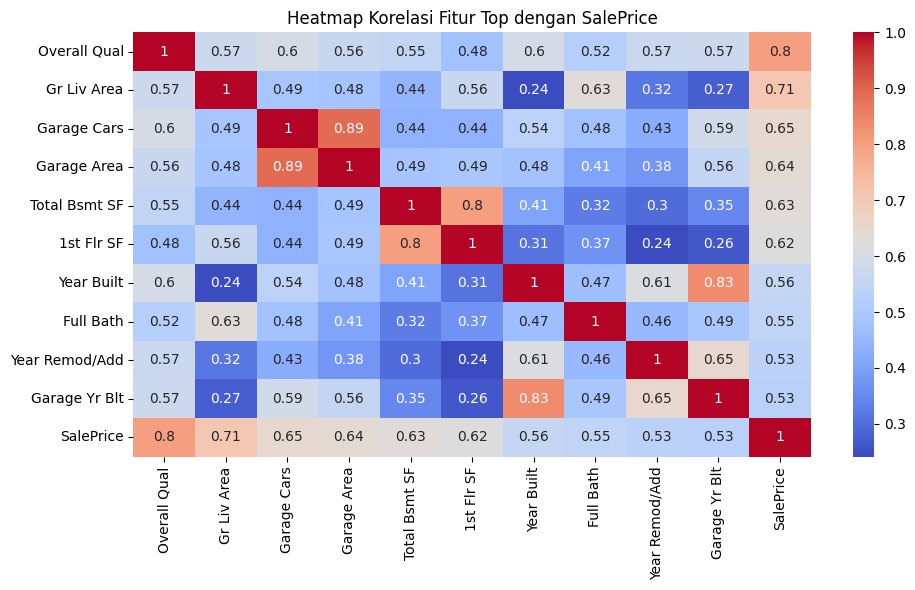

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Top dengan SalePrice")
plt.tight_layout()
plt.show()

Heatmap ini menunjukkan hubungan korelasi antara fitur numerik dengan harga rumah (SalePrice), di mana warna merah menandakan korelasi positif yang kuat, dan biru menunjukkan korelasi yang lemah atau negatif. Dari heatmap, terlihat bahwa fitur seperti `OverallQual`, `GrLivArea`, `GarageCars`, dan `TotalBsmtSF` memiliki korelasi paling tinggi terhadap harga rumah, yang berarti fitur-fitur tersebut sangat berpengaruh dalam menentukan nilai jual rumah. Sementara fitur seperti `YrSold` atau `BsmtHalfBath` memiliki korelasi rendah, menandakan pengaruhnya terhadap harga cukup kecil.

#### **Distribusi Harga Rumah (SalePrice)**

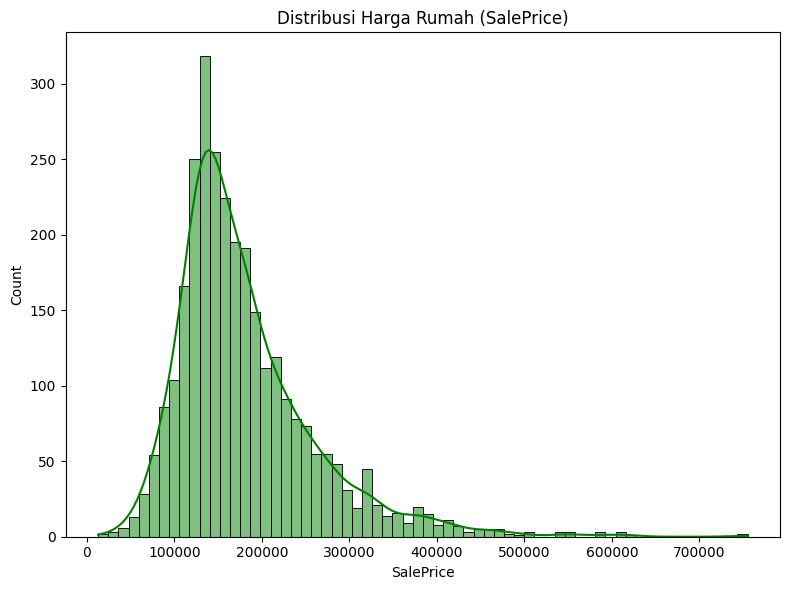

In [40]:
# Distribusi SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, color='green')
plt.title("Distribusi Harga Rumah (SalePrice)")
plt.xlabel("SalePrice")
plt.tight_layout()
plt.show()

Histogram ini menggambarkan distribusi frekuensi harga rumah yang ada dalam dataset. Distribusi terlihat miring ke kanan (right-skewed), artinya sebagian besar rumah dijual pada kisaran harga yang relatif rendah (antara 100.000 hingga 200.000), sementara hanya sebagian kecil yang dijual dengan harga sangat tinggi. Hal ini menunjukkan bahwa harga rumah tidak terdistribusi normal, dan keberadaan outlier perlu diperhatikan dalam proses modeling atau analisis statistik lebih lanjut.

#### **Scatter Plot Gr Liv Area vs SalePrice**

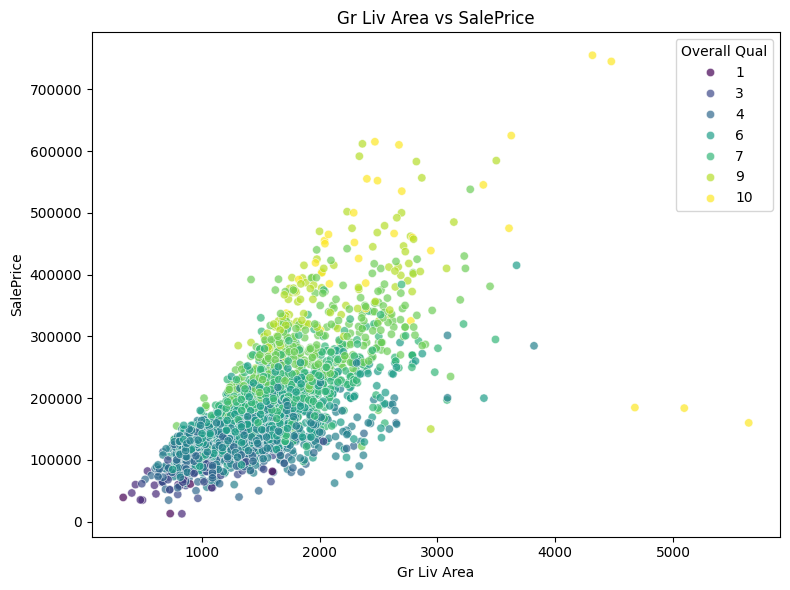

In [41]:
# Scatter plot Gr Liv Area vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='viridis', alpha=0.7)
plt.title("Gr Liv Area vs SalePrice")
plt.tight_layout()
plt.show()

Scatter plot ini menampilkan hubungan antara luas area tinggal `Gr Liv Area` dan harga rumah `SalePrice`, yang menunjukkan pola hubungan linear positif—semakin luas rumah, umumnya semakin mahal harganya. Warna titik mencerminkan kualitas keseluruhan rumah `OverallQual`, dan terlihat bahwa rumah dengan kualitas lebih tinggi (warna lebih terang) cenderung memiliki harga yang lebih tinggi meskipun pada area tinggal yang sama. Ini menunjukkan bahwa baik luas rumah maupun kualitas bangunan berperan besar dalam menentukan harga rumah.

# ✨ **3. Feature Selection & Preprocessing**

Pada tahap Feature Selection & Preprocessing, dilakukan pemilihan fitur numerik dan kategorikal yang dianggap relevan untuk memprediksi harga rumah `SalePrice`. Fitur numerik yang dipilih seperti `Overall Qual`, `Gr Liv Area`, dan `Total Bsmt SF` memiliki korelasi tinggi terhadap harga rumah, sedangkan fitur kategorikal seperti `Neighborhood` dan `Exter Qual` dinilai mewakili kualitas lingkungan dan eksterior rumah. Selain itu, ditambahkan fitur buatan bernama `House Age` yang dihitung dari selisih antara tahun penjualan dan tahun pembangunan rumah, sebagai indikator usia rumah. Data kemudian difilter agar hanya berisi fitur yang relevan dan menghapus baris yang mengandung nilai kosong. Untuk preprocessing, dibuat pipeline yang menstandarisasi fitur numerik menggunakan `StandardScaler` dan mengubah fitur kategorikal menjadi bentuk numerik menggunakan `OneHotEncoder`, lalu semua transformasi tersebut digabungkan menggunakan `ColumnTransformer`. Tahapan ini penting untuk memastikan semua fitur dalam format yang sesuai sebelum dimasukkan ke model prediksi.

In [42]:
# Fitur numerik dan kategorikal
numeric_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF',
                    'Year Built', '1st Flr SF', 'Full Bath', 'TotRms AbvGrd']
categorical_features = ['Neighborhood', 'Exter Qual']

# Fitur buatan
df['House Age'] = df['Yr Sold'] - df['Year Built']

# Pilih data dan drop NaN
features = numeric_features + categorical_features + ['House Age']
df_model = df[features + ['SalePrice']].dropna()

X = df_model.drop(columns='SalePrice')
y = df_model['SalePrice']

# Preprocessing pipeline
numeric_transformer = Pipeline([ 
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([ 
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[ 
    ('num', numeric_transformer, numeric_features + ['House Age']),
    ('cat', categorical_transformer, categorical_features)
])

# 🔄 **4. Train-Test Split**

Pada tahap Train-Test Split, data dibagi menjadi dua bagian utama yaitu data latih `X_train`, `y_train` dan data uji `X_test`, `y_test` dengan proporsi 80:20. Artinya, 80% dari data digunakan untuk melatih model, sementara 20% sisanya digunakan untuk menguji performa model setelah dilatih. Pembagian ini bertujuan untuk mengevaluasi kemampuan model dalam memprediksi data yang belum pernah dilihat sebelumnya. Parameter `random_state=42` digunakan agar pembagian data dilakukan secara acak namun tetap bisa direproduksi (reproducible), sehingga hasil pembagian akan konsisten setiap kali kode dijalankan. Tahap ini penting untuk mencegah overfitting dan memastikan model memiliki generalisasi yang baik.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 **5. Modeling & Tuning**

Pada tahap Modeling & Tuning, dilakukan pelatihan model dengan berbagai algoritma regresi serta penyetelan (tuning) untuk meningkatkan performanya. Tiga model dasar yang digunakan adalah **Linear Regression**, **Random Forest Regressor**, dan **XGBoost Regressor**.

In [44]:
# Base models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Tuning Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_tuned = RandomizedSearchCV(rf, param_dist_rf, n_iter=10, cv=3,
                              scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
rf_pipeline = Pipeline([ 
    ('preprocessor', preprocessor),
    ('regressor', rf_tuned)
])
rf_pipeline.fit(X_train, y_train)
best_rf = rf_tuned.best_estimator_

# XGBoost pipeline
xgb_pipeline = Pipeline([ 
    ('preprocessor', preprocessor),
    ('regressor', xgb)
])
xgb_pipeline.fit(X_train, y_train)

# Stacking
stacked_model = StackingRegressor(
    estimators=[ 
        ('lr', Pipeline([('pre', preprocessor), ('lr', lr)])),
        ('rf', Pipeline([('pre', preprocessor), ('rf', best_rf)])),
        ('xgb', Pipeline([('pre', preprocessor), ('xgb', xgb)])),
    ],
    final_estimator=LinearRegression()
)
stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('lr',
                               Pipeline(steps=[('pre',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['Overall '
                                                                                  'Qual',
                                                                                  'Gr '
                                                                                  'Liv '
                                                                                  'Area',
                                                                                  'Garage '
                                                                                  'Cars',
                                                                                  'Total '
                                                                                  'Bsmt '
                                                                                  'SF',
                                                                                  'Year '
                                                                                  'Built',
                                                                                  '1st '
                                                                                  'Flr '
                                                                                  'SF',
                                                                                  'Full '
                                                                                  'Bath',
                                                                                  'TotRms '
                                                                                  'AbvGrd',
                                                                                  'House '
                                                                                  'Age']),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('encoder',
                                                                                                  OneHotEncoder(handle_unknown='ig...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]))],
                  final_estimator=LinearRegression())

Untuk model Random Forest, dilakukan tuning hyperparameter menggunakan `RandomizedSearchCV` dengan kombinasi parameter seperti jumlah pohon`(n_estimators`, kedalaman maksimum `max_depth`, dan jumlah minimum sampel untuk split `min_samples_split` untuk mencari kombinasi terbaik berdasarkan skor `neg_root_mean_squared_error`. Setelah itu, model Random Forest terbaik digabungkan dalam pipeline bersama preprocessing. Model XGBoost juga dilatih menggunakan pipeline serupa. Terakhir, dilakukan **teknik Stacking**, yaitu menggabungkan ketiga model (Linear Regression, Random Forest, dan XGBoost) sebagai model base, kemudian hasil prediksi mereka digabung dan dipelajari oleh model akhir berupa Linear Regression. Pendekatan stacking ini bertujuan untuk memanfaatkan kekuatan masing-masing model dan menghasilkan prediksi yang lebih akurat.

# 📈 **6. Evaluation**

Pada tahap Evaluation, dilakukan pengujian performa model stacking menggunakan metrik **RMSE Root Mean Squared Error** untuk mengukur seberapa jauh hasil prediksi dari nilai sebenarnya dalam satuan yang sama dengan target `SalePrice`. 

e:\Software\Python\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\Software\Python\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USer\AppData\Local\Temp\ipykernel_12956\644035278.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()), palette='viridis')


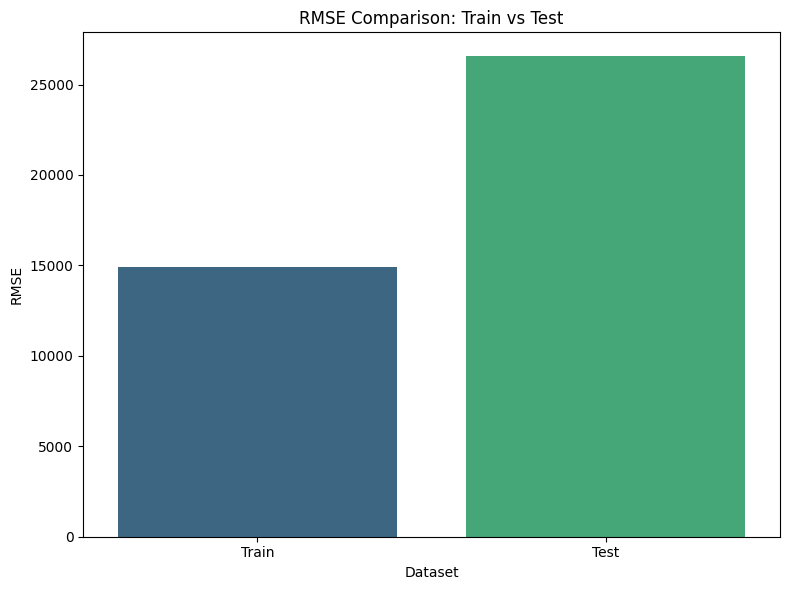

🔎 RMSE Stacking Regressor:
  - Train: 14902.8763
  - Test : 26559.5184
📈 Stacking Regressor R² Score: 0.9142


In [45]:
# Evaluate on Training Data
y_train_pred = stacked_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# RMSE untuk Test Data
y_pred = stacked_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Plotting RMSE for Training and Testing
rmse_values = {'Train': train_rmse, 'Test': test_rmse}

# Plot RMSE comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()), palette='viridis')
plt.title('RMSE Comparison: Train vs Test')
plt.xlabel('Dataset')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

print("🔎 RMSE Stacking Regressor:")
print(f"  - Train: {train_rmse:.4f}")
print(f"  - Test : {test_rmse:.4f}")
stacked_r2 = r2_score(y_test, y_pred)
print(f"📈 Stacking Regressor R² Score: {stacked_r2:.4f}")

Hasil evaluasi menunjukkan bahwa RMSE pada data train adalah sekitar **14.902**, sedangkan pada data test meningkat menjadi **26.559**. Grafik batang memperjelas perbedaan ini, menunjukkan bahwa model memiliki performa lebih baik pada data pelatihan dibanding data pengujian. Hal ini bisa menjadi indikasi **overfitting ringan**, di mana model terlalu menyesuaikan diri pada data train. Meskipun begitu, nilai **R² Score sebesar 0.9142** menunjukkan bahwa model masih mampu menjelaskan lebih dari **91% variansi** harga rumah pada data test, yang merupakan indikasi performa yang sangat baik dalam regresi. Evaluasi ini penting untuk memahami keseimbangan antara akurasi dan generalisasi model terhadap data baru.

#### **Evaluation Every Base Model**
Bagian ini bertujuan untuk mengevaluasi kontribusi masing-masing model dasar yang digunakan dalam ensemble Stacking Regressor. 

Pertama, dibuat dictionary `model_keys` untuk memetakan nama model (seperti Linear Regression, Random Forest, dan XGBoost) ke label yang digunakan dalam objek `stacked_model`. Kemudian, dilakukan iterasi untuk menghitung **R² Score** dari setiap model terhadap data uji `X_test, y_test`. 

In [46]:
# Mapping label ke nama estimator pada stacking
model_keys = {
    'Linear Regression': 'lr',
    'Random Forest': 'rf',
    'XGBoost': 'xgb'
}

# Menampilkan R² Score per model
for label, key in model_keys.items():
    score = stacked_model.named_estimators_[key].score(X_test, y_test)
    print(f"{label} R² Score: {score:.4f}")

Linear Regression R² Score: 0.8427
Random Forest R² Score: 0.9174
XGBoost R² Score: 0.9121


Hasil evaluasi menunjukkan bahwa **Random Forest memiliki performa terbaik** dengan R² sebesar **0.9174**, diikuti oleh **XGBoost (0.9121)**, dan **Linear Regression (0.8427)**. Ini menandakan bahwa meskipun semua model berkontribusi terhadap model ensemble, Random Forest dan XGBoost memiliki peran dominan karena kemampuannya yang lebih tinggi dalam menjelaskan variansi data target pada data uji.

# 📊 **7. Visualisasi Hasil**

Pada tahap Visualisasi Hasil, dilakukan tiga jenis visualisasi untuk memperkuat evaluasi model. 

#### 📌 **Prediksi vs Aktual Harga Rumah**

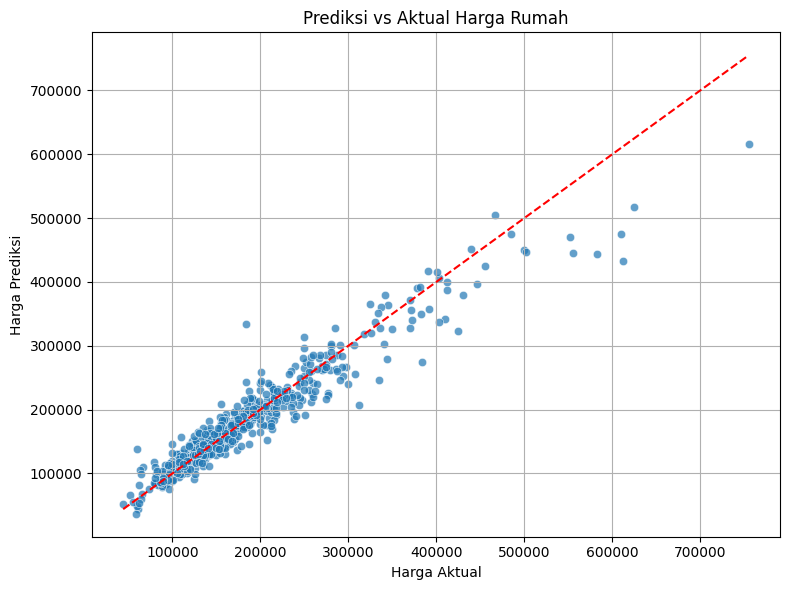

In [47]:
y_pred = stacked_model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Prediksi vs Aktual Harga Rumah')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.grid(True)
plt.tight_layout()
plt.show()

Visualisasi ini berupa scatter plot yang membandingkan harga rumah aktual (sumbu X) dengan hasil prediksi model (sumbu Y). Garis merah putus-putus menunjukkan garis ideal di mana nilai prediksi sama persis dengan nilai aktual. Sebagian besar titik mendekati garis ini, artinya model menghasilkan prediksi yang cukup akurat. Namun, terlihat juga beberapa outlier, terutama untuk harga rumah yang sangat tinggi, yang menunjukkan bahwa model agak kesulitan memprediksi nilai ekstrem.

#### 📌 **Distribusi Error (Aktual - Prediksi)**

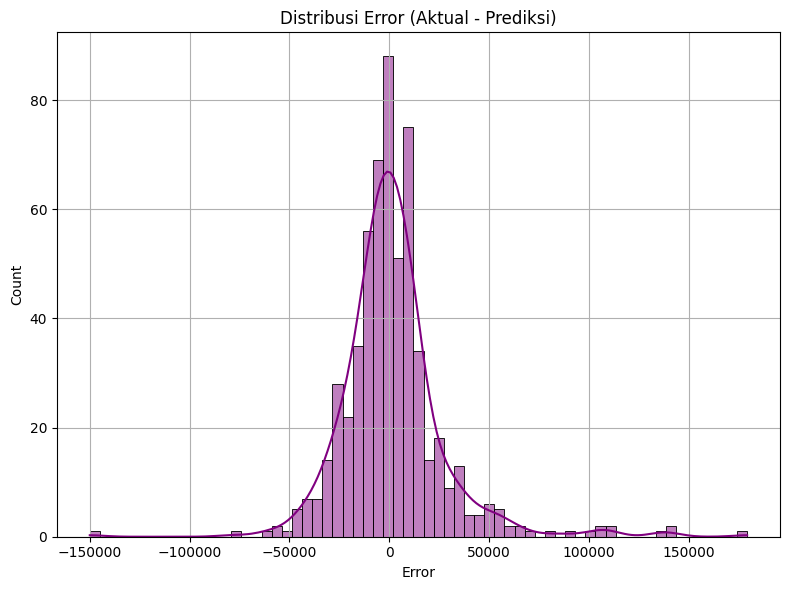

In [48]:
# Distribusi Error
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='purple')
plt.title('Distribusi Error (Aktual - Prediksi)')
plt.xlabel('Error')
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik ini menunjukkan sebaran selisih antara harga aktual dan hasil prediksi. Bentuk histogramnya mendekati distribusi normal, berpusat di sekitar nol, yang menandakan bahwa error model cukup seimbang—jumlah prediksi yang terlalu tinggi dan terlalu rendah hampir sama. Ini adalah indikasi bahwa model tidak mengalami bias signifikan ke satu arah (over atau under prediction). Namun, masih ada ekor distribusi yang cukup panjang ke kiri dan kanan, menandakan ada beberapa prediksi yang jauh dari nilai sebenarnya.

#### 📌 **RMSE per Model in Stacking Regressor**

e:\Software\Python\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\Software\Python\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\Software\Python\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USer\AppData\Local\Temp\ipykernel_12956\892377726.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

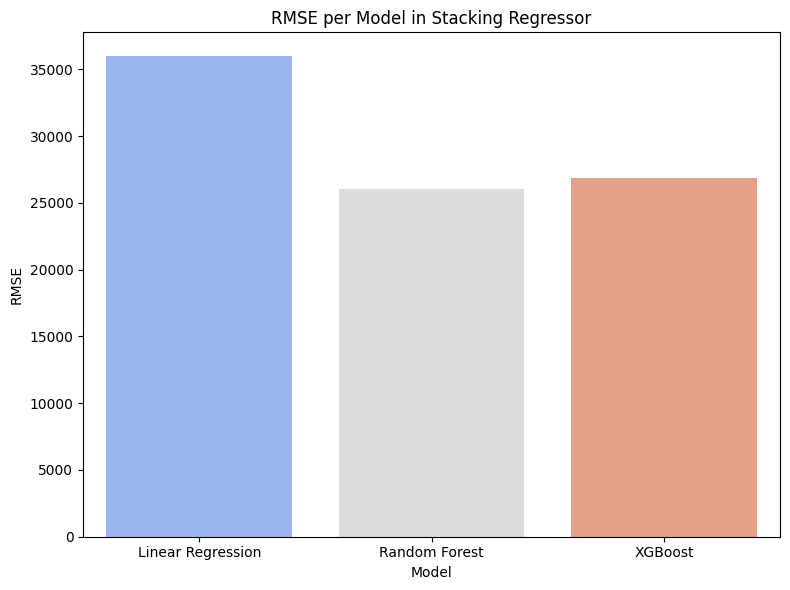

In [49]:
# RMSE per Model dalam Stacking Regressor
model_rmse = {
    'Linear Regression': mean_squared_error(y_test, stacked_model.named_estimators_['lr'].predict(X_test), squared=False),
    'Random Forest': mean_squared_error(y_test, stacked_model.named_estimators_['rf'].predict(X_test), squared=False),
    'XGBoost': mean_squared_error(y_test, stacked_model.named_estimators_['xgb'].predict(X_test), squared=False)
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_rmse.keys()), y=list(model_rmse.values()), palette='coolwarm')
plt.title('RMSE per Model in Stacking Regressor')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

Visualisasi ini membandingkan nilai Root Mean Squared Error (RMSE) dari masing-masing model yang digunakan dalam ensemble Stacking: Linear Regression, Random Forest, dan XGBoost. Hasilnya, Linear Regression memiliki RMSE tertinggi, yang berarti performanya paling lemah dalam hal akurasi prediksi. Sementara itu, Random Forest dan XGBoost menunjukkan RMSE yang lebih rendah dan hampir seimbang, menandakan bahwa keduanya memiliki kontribusi yang lebih kuat dan stabil dalam meningkatkan performa keseluruhan dari model stacking.